In [155]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

plt.style.use("Solarize_Light2")

import warnings
warnings.filterwarnings("ignore")

In [156]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [157]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [158]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [159]:
df.drop(["CustomerID"], axis="columns", inplace=True)

- <h4><b>Customer age segmentation

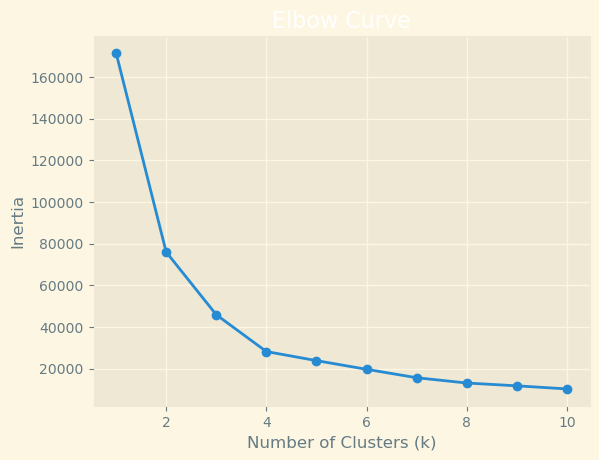

In [160]:
X = df[["Age", "Spending Score (1-100)"]].iloc[: , :].values

max_k = 10
inertia = []
k_values = range(1, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [161]:
kmeans = KMeans(n_clusters = 4 ,max_iter=1000, tol=.00001,  random_state= 64  , algorithm='elkan')
kmeans.fit(X)

KMeans(algorithm='elkan', max_iter=1000, n_clusters=4, random_state=64,
       tol=1e-05)

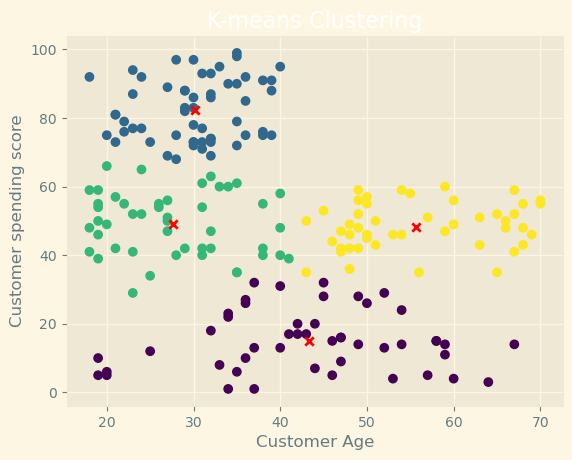

In [162]:
plt.scatter(X[:, 0], X[:, 1], c= kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Customer Age')
plt.ylabel('Customer spending score')
plt.title('K-means Clustering')
plt.show()

In [163]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

distances = [np.linalg.norm(X2[i] - centroids[labels[i]]) for i in range(len(X))]
wcss = np.sum(np.square(distances))

print("WCSS:", wcss)

WCSS: 274901.100177305


In [164]:
labels = kmeans.labels_
silhouette_coefficient = silhouette_score(X, labels)

print("Silhouette Coefficient:", silhouette_coefficient)

Silhouette Coefficient: 0.49973941540141753


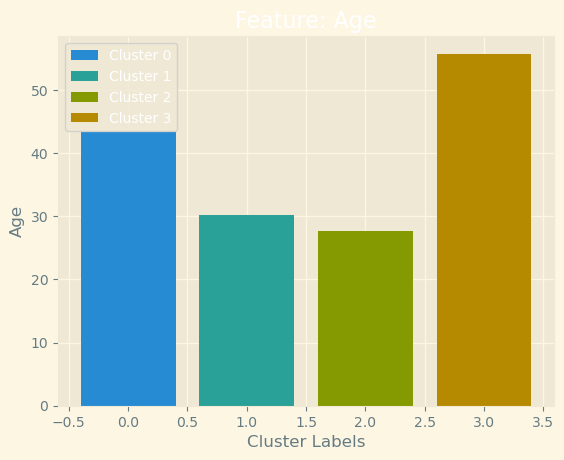

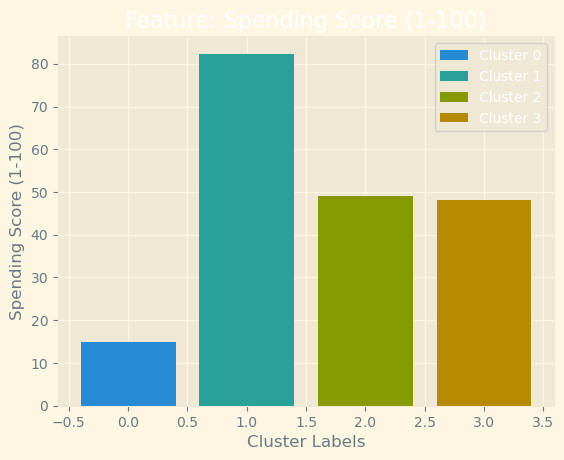

In [165]:
cluster_labels = kmeans.labels_

df1 = df.drop(["Gender", "Annual Income (k$)"], axis="columns")
df1['cluster_labels'] = cluster_labels

cluster_profiles = df1.groupby('cluster_labels').mean()

# Visualize the feature distributions across clusters
for feature in cluster_profiles.columns:
    plt.figure()
    for cluster_label, profile in cluster_profiles.iterrows():
        plt.bar(cluster_label, profile[feature], label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster Labels')
    plt.ylabel(feature)
    plt.title(f'Feature: {feature}')
    plt.legend()
    plt.show()

- <h4><b> Customer income segmentation

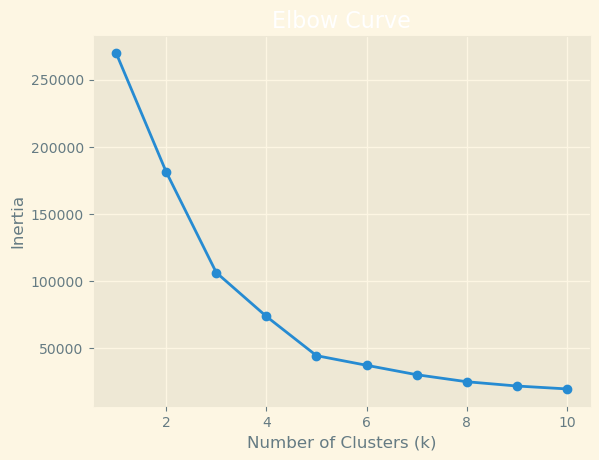

In [166]:
X2 = df[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[: , :].values

max_k = 10
inertia = []
k_values = range(1, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [167]:
kmeans_2 = KMeans(n_clusters = 5 ,max_iter=1000, tol=.000001,  random_state= 64, algorithm="full")
kmeans_2.fit(X2)

KMeans(algorithm='full', max_iter=1000, n_clusters=5, random_state=64,
       tol=1e-06)

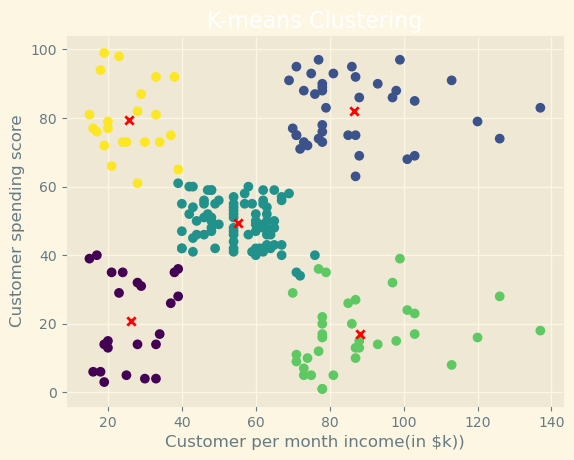

In [168]:
plt.scatter(X2[:, 0], X2[:, 1], c= kmeans_2.labels_, cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], marker='x', color='red')
plt.xlabel('Customer per month income(in $k))')
plt.ylabel('Customer spending score')
plt.title('K-means Clustering')
plt.show()

In [169]:
centroids = kmeans_2.cluster_centers_
labels = kmeans_2.labels_

distances = [np.linalg.norm(X2[i] - centroids[labels[i]]) for i in range(len(X2))]
wcss = np.sum(np.square(distances))

print("WCSS:", wcss)

WCSS: 44448.45544793371


In [170]:
labels = kmeans_2.labels_
silhouette_coefficient = silhouette_score(X2, labels)

print("Silhouette Coefficient:", silhouette_coefficient)

Silhouette Coefficient: 0.553931997444648


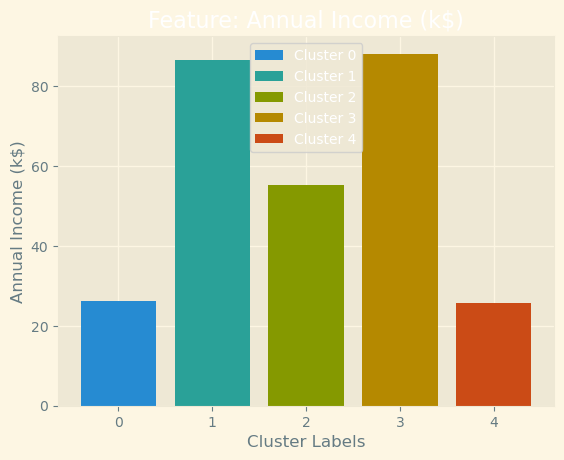

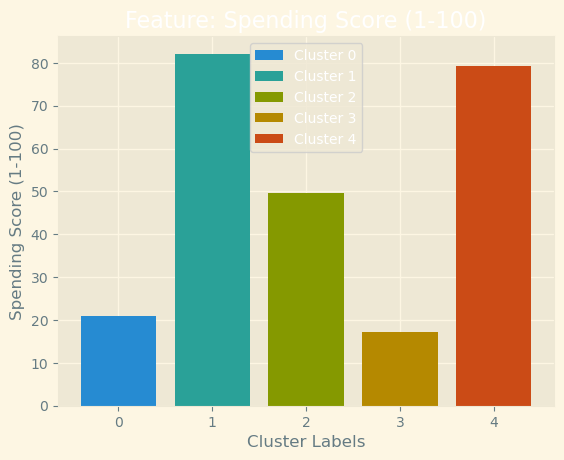

In [171]:
cluster_labels = kmeans_2.labels_

df2 = df.drop(["Gender", "Age"], axis="columns")
df2['cluster_labels'] = cluster_labels

cluster_profiles = df2.groupby('cluster_labels').mean()

# Visualize the feature distributions across clusters
for feature in cluster_profiles.columns:
    plt.figure()
    for cluster_label, profile in cluster_profiles.iterrows():
        plt.bar(cluster_label, profile[feature], label=f'Cluster {cluster_label}')
    plt.xlabel('Cluster Labels')
    plt.ylabel(feature)
    plt.title(f'Feature: {feature}')
    plt.legend()
    plt.show()